# `Step 1`: Importing the dataset

In [ ]:
# Installing kaggle
!pip install -q kaggle

In [ ]:
# To upload kaggle json file from the local systems
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinitkhedu","key":"048a9c2f7dd036b48fbf7807cdd1ba5a"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a kaggle directory
!mkdir ~/.kaggle

In [ ]:
# Copy the kaggle.json to folder created 
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:41<00:00, 24.4MB/s]
100% 2.29G/2.29G [01:41<00:00, 24.2MB/s]


# `Step 2`: Unzip the dataset and make directories 

In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
# Import the helper function and  get the functions needed that we are going to need in this notebook
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-06 07:16:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-06 07:16:38 (70.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import walk_through_dir, plot_loss_curves

In [ ]:
import shutil
shutil.rmtree("/content/chest_xray/__MACOSX")
shutil.rmtree("/content/chest_xray/chest_xray")

In [ ]:
walk_through_dir("/content/chest_xray")

There are 3 directories and 0 images in '/content/chest_xray'.
There are 2 directories and 0 images in '/content/chest_xray/test'.
There are 0 directories and 234 images in '/content/chest_xray/test/NORMAL'.
There are 0 directories and 390 images in '/content/chest_xray/test/PNEUMONIA'.
There are 2 directories and 0 images in '/content/chest_xray/val'.
There are 0 directories and 8 images in '/content/chest_xray/val/NORMAL'.
There are 0 directories and 8 images in '/content/chest_xray/val/PNEUMONIA'.
There are 2 directories and 0 images in '/content/chest_xray/train'.
There are 0 directories and 1341 images in '/content/chest_xray/train/NORMAL'.
There are 0 directories and 3875 images in '/content/chest_xray/train/PNEUMONIA'.


In [ ]:
# Visualize the images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_images(target_dir, target_class):
  # Setup the target directory 
  target_folder = target_dir + target_class

  # Get the random image path
  rand_img = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot
  img = mpimg.imread(target_folder + "/" + rand_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False);

  print(f"Image shape :{img.shape}")

  return img

Image shape :(1000, 1328)


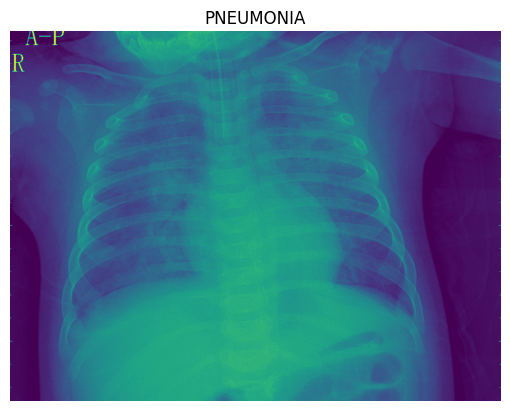

In [ ]:
img = view_random_images(target_dir="/content/chest_xray/train/",
                         target_class="PNEUMONIA")

Image shape :(1194, 1572)


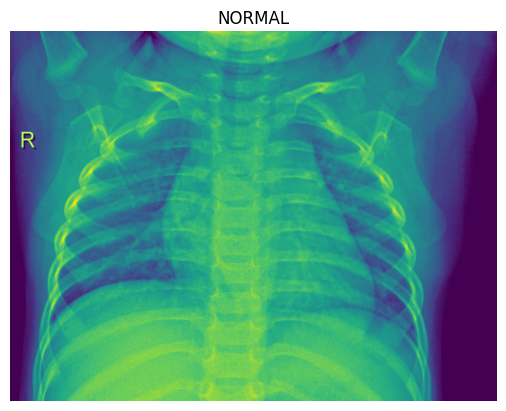

In [ ]:
img = view_random_images(target_dir="/content/chest_xray/train/",
                         target_class="NORMAL")

# Preparing the data for modelling


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 1. Preprocessing the data (getting the values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

# 2. Setting and getting the path of our directories 
train_dir = "/content/chest_xray/train"
test_dir = "/content/chest_xray/test"
val_dir = "/content/chest_xray/val"

# 3. Importing the data from the directories and turn it into the batches
print("Train Data")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                                 batch_size=32,
                                                                 target_size=(224, 224),
                                                                 class_mode="binary",
                                                                 seed=42)

print("Test Data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                                batch_size=32,
                                                                target_size=(224,224),
                                                                class_mode="binary",
                                                                seed=42)

print("Val Data")
val_data = val_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=32,
                                                                target_size=(224,224),
                                                                class_mode="binary",
                                                                seed=42)



Train Data
Found 5216 images belonging to 2 classes.
Test Data
Found 624 images belonging to 2 classes.
Val Data
Found 16 images belonging to 2 classes.


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 K

# `Step 3`: Modelling


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/tuned_resnet.h5")

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.evaluate(test_data)

20/20 [==============================] - 22s 530ms/step - loss: 0.2026 - accuracy: 0.9439


[0.20261278748512268, 0.9439102411270142]

In [ ]:
import numpy as np
def pneumoniaPrediction(img):
    img = np.array(img)/255
    img = img.reshape(1, 224, 224, 3)
    isPneumonic = model.predict(img)[0]
    imgClass = "Normal" if isPneumonic<0.5 else "Pneumonic"
    return imgClass

In [ ]:
pr = model.predict(test_data)
for i in range(len(pr)):
    if pr[i]>0.5:
        pr[i]=1
    else:
        pr[i]=0

20/20 [==============================] - 13s 573ms/step


In [ ]:
import gradio as gr
img = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=1)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
interface = gr.Interface(fn = pneumoniaPrediction,
                            title = "Pneumonia Detection using Chest X-Ray",
                            inputs = img,
                            outputs = label,
                            interpretation = "default")
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://541ec643936af6dcf1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 44ms/step
